# Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget



# === CONFIGURATION ===
# --- Step 1: Set the name of your .txt file here ---
filename = "40_steps.txt"  # <--- CHANGE THIS
# filename = "10_mais_10.txt"  # <--- CHANGE THIS

collumn_names = ['ax', 'ay', 'az', 'gx', 'gy', 'gz']
df = pd.read_csv(filename, header=None, names=collumn_names)
# === ADD THE NEW COLUMN ===
# Calculate the acceleration magnitude using the formula sqrt(ax^2 + ay^2 + az^2)
# and add it as a new column called 'accel_magnitude'.
df['accel_magnitude'] = np.sqrt(df['ax']**2 + df['ay']**2 + df['az']**2)
print(f"Successfully loaded '{filename}'.")
print(f"Found {len(df)} rows and {df.shape[1]} columns of data.")

# --- Step 2: Define the titles for your plots ---
titles = [
    "Accel X (g)", "Accel Y (g)", "Accel Z (g)",
    "Gyro X (°/s)", "Gyro Y (°/s)", "Gyro Z (°/s)"
]

# o -1 TIRA O OFFSET DA GRAVIDADE JÁ !!!!
df['accel_magnitude'] = np.sqrt(df['ax']**2 + df['ay']**2 + df['az']**2) - 1


Successfully loaded '40_steps.txt'.
Found 5897 rows and 7 columns of data.


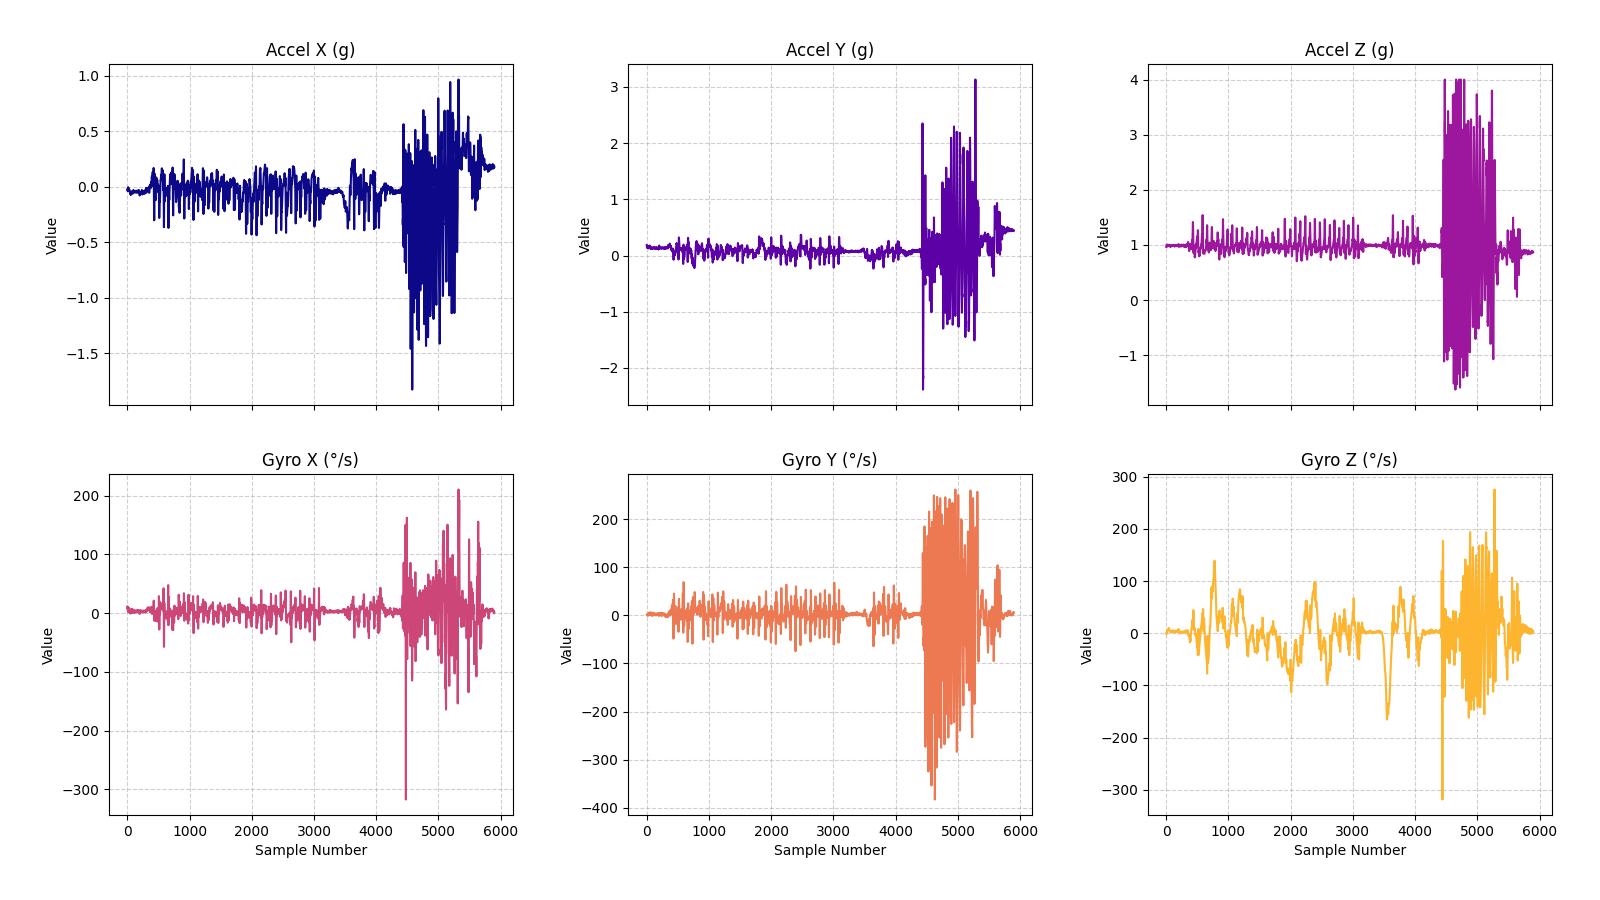

In [2]:
# Create a figure and a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 9), sharex=True)

# Flatten the 2x3 `axes` array into a 1D array to easily loop through it
axes = axes.flatten()

# --- Loop through each of the 6 columns and plot it ---
for i in range(6):
    ax = axes[i]            # Get the current subplot axis
    column_data = df[collumn_names[i]]     # Get the data for the i-th column

    # Plot the data on the current axis
    ax.plot(column_data, label=titles[i], color=plt.cm.plasma(i/6))

    # Set the title and labels for the subplot
    ax.set_title(titles[i], fontsize=12)
    ax.set_ylabel("Value")

    # Add a grid for better readability
    ax.grid(True, linestyle='--', alpha=0.6)

# Set the x-axis label only for the bottom plots
for i in range(3, 6):
    axes[i].set_xlabel("Sample Number")

# Adjust the layout to prevent titles and labels from overlapping
fig.tight_layout(pad=3.0)
# --- Show the plot window ---
plt.show()

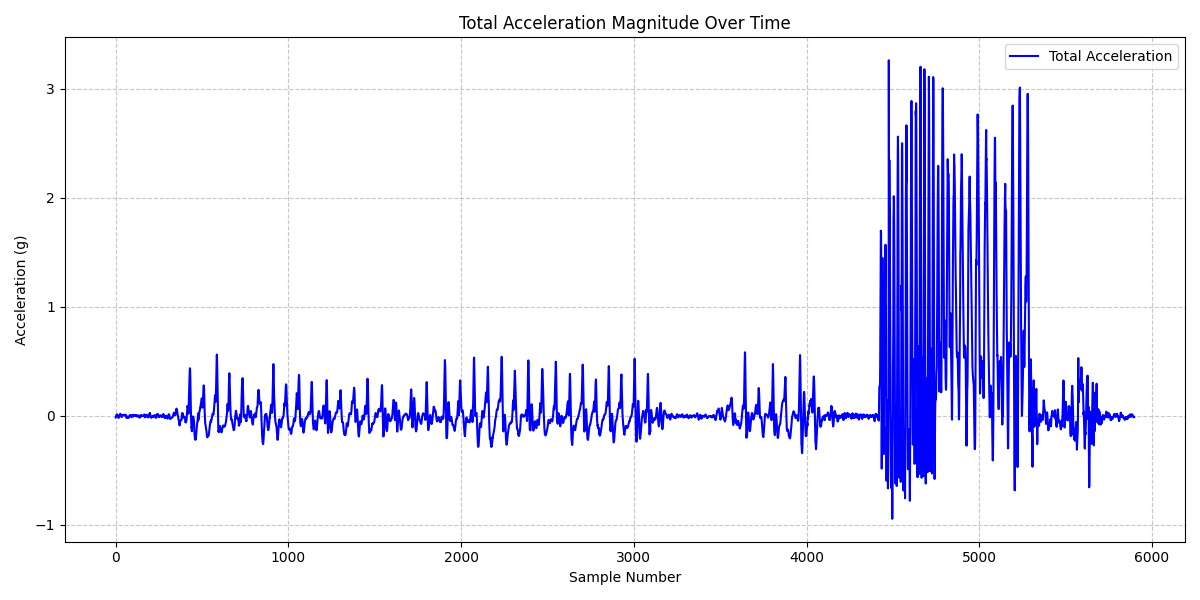

In [3]:
plt.figure(figsize=(12, 6))

# Plot the 'accel_magnitude' column
plt.plot(df['accel_magnitude'], label='Total Acceleration', color='blue')

# Add titles and labels for clarity
plt.title('Total Acceleration Magnitude Over Time')
plt.xlabel('Sample Number')
plt.ylabel('Acceleration (g)')

# Add a grid for easier analysis
plt.grid(True, linestyle='--', alpha=0.7)

# Add a legend to identify the plot line
plt.legend()

# Ensure the plot layout is clean
plt.tight_layout()

# Show the plot
plt.show()

# Filtering

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def exponential_moving_average(signal, alpha):
    """Calculates the Exponential Moving Average of a signal."""
    filtered_signal = [signal[0]]
    for i in range(1, len(signal)):
        new_filtered_value = (alpha * signal[i]) + ((1 - alpha) * filtered_signal[-1])
        filtered_signal.append(new_filtered_value)
    return filtered_signal

# --- Apply the custom filters ---
# Apply Exponential Moving Average with a smoothing factor of 0.1
# A smaller alpha means more smoothing.
alpha = 0.03
df['ax_lp'] = exponential_moving_average(df['ax'] , alpha=alpha)
df['ay_lp'] = exponential_moving_average(df['ay'] , alpha=alpha)
df['az_lp'] = exponential_moving_average(df['az'] , alpha=alpha)

df['accel_magnitude_lp'] = np.sqrt(df['ax_lp']**2 + df['ay_lp']**2 + df['az_lp']**2) - 1



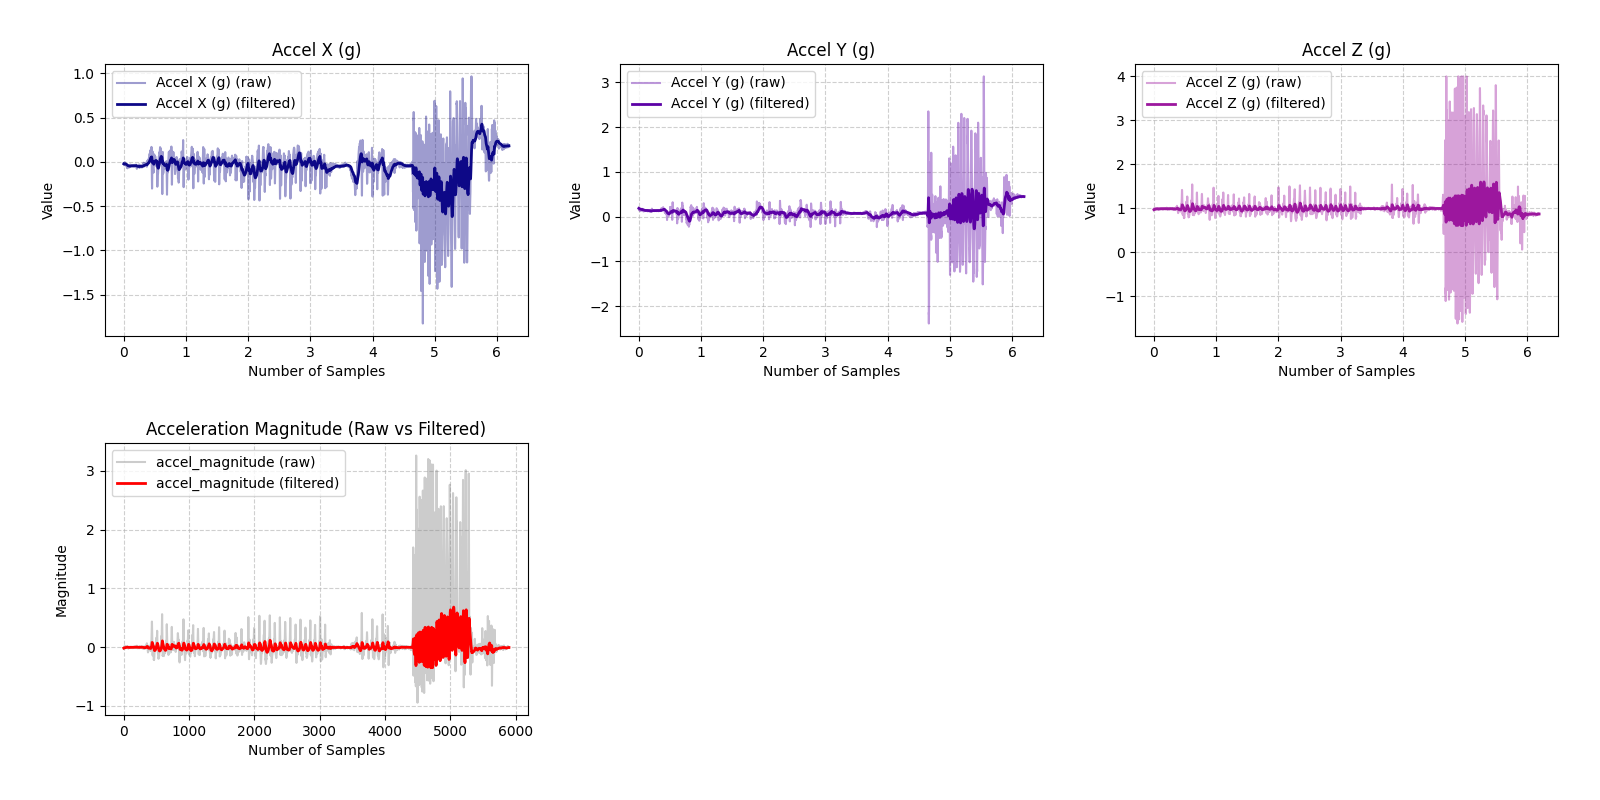

In [5]:
import matplotlib.pyplot as plt

# Create a 2x3 grid of subplots (extra row for the magnitude plot)
fig, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False)

# Flatten axes array
axes = axes.flatten()

# --- Top row: your 3 filtered plots ---
for i in range(3):
    ax = axes[i]  # current subplot axis

    # Get data for this subplot
    col = collumn_names[i]  # make sure variable name is correct (not 'collumn_names')
    raw = df[col]
    filtered = df[col + "_lp"]


    # Plot original and filtered signals
    ax.plot(np.arange(len(df)) / 952, raw, label=f"{titles[i]} (raw)", color=plt.cm.plasma(i / 6), alpha=0.4)
    ax.plot(np.arange(len(df)) / 952, filtered, label=f"{titles[i]} (filtered)", color=plt.cm.plasma(i / 6), linewidth=2)

    # Titles, labels, and grid
    ax.set_title(titles[i], fontsize=12)
    ax.set_ylabel("Value")
    ax.set_xlabel("Number of Samples")
    ax.grid(True, linestyle="--", alpha=0.6)
    ax.legend()

# --- Bottom plot: accel_magnitude vs accel_magnitude_lp ---
ax_mag = axes[3]  # use the next available subplot (bottom-left position)

ax_mag.plot(df['accel_magnitude'], label='accel_magnitude (raw)', color='gray', alpha=0.4)
ax_mag.plot(df['accel_magnitude_lp'], label='accel_magnitude (filtered)', color='red', linewidth=2)

ax_mag.set_title("Acceleration Magnitude (Raw vs Filtered)", fontsize=12)
ax_mag.set_ylabel("Magnitude")
ax_mag.set_xlabel("Number of Samples")
ax_mag.grid(True, linestyle="--", alpha=0.6)
ax_mag.legend()

# Hide any unused subplots (since we have 4 used out of 6)
for j in range(4, 6):
    fig.delaxes(axes[j])

# Adjust layout
fig.tight_layout(pad=3.0)

# Show figure
plt.show()


### aplicar agora um filtro de media para reduzir mais e termos apenas picos UP-DOWN e nao coisas tipo UP-Up(mas menos intenso) e down

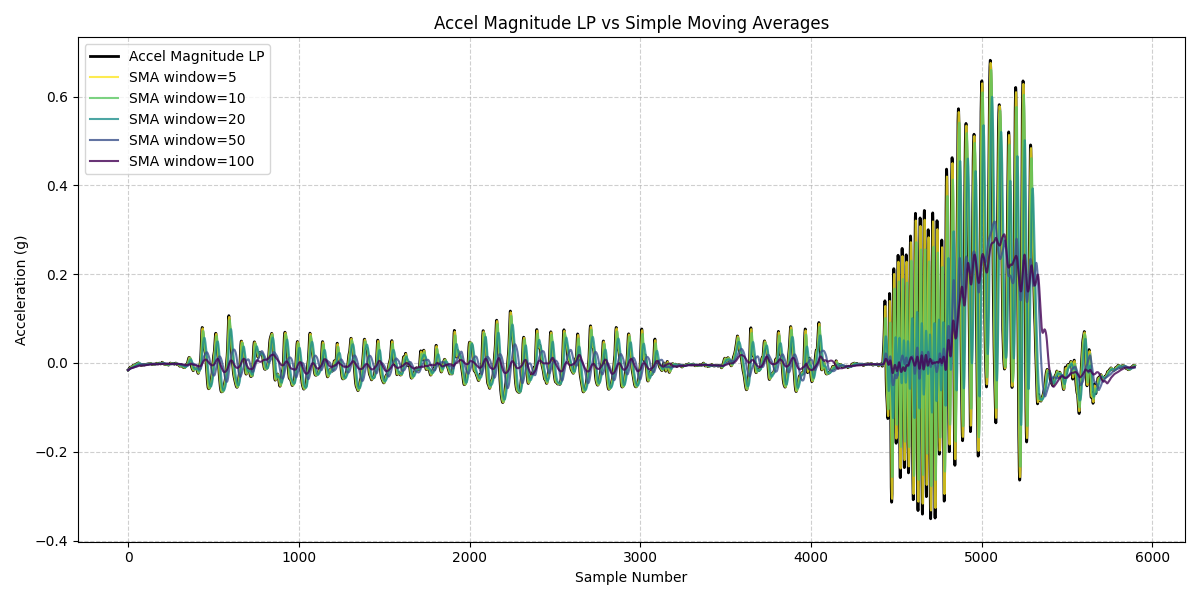

In [6]:
import matplotlib.pyplot as plt


def simple_moving_average(signal, window_size):
    """Calculates the Simple Moving Average of a signal."""
    filtered_signal = []
    for i in range(len(signal)):
        start_index = max(0, i - window_size + 1)
        window = signal[start_index : i + 1]
        window_average = sum(window) / len(window)
        filtered_signal.append(window_average)
    return filtered_signal

# Example window sizes for SMAs
window_sizes = [5, 10, 20, 50, 100]

# Calculate all SMAs of accel_magnitude_lp with different windows
sma_signals = [simple_moving_average(df['accel_magnitude_lp'], w) for w in window_sizes]

plt.figure(figsize=(12, 6))

# Plot the original low-pass filtered accel magnitude
plt.plot(df['accel_magnitude_lp'], label='Accel Magnitude LP', linewidth=2, color='black')

# Plot each SMA with different window sizes
colors = plt.cm.viridis_r(np.linspace(0, 1, len(window_sizes)))
for i, (sma, w) in enumerate(zip(sma_signals, window_sizes)):
    plt.plot(sma, label=f'SMA window={w}', alpha=0.8, color=colors[i])

plt.title('Accel Magnitude LP vs Simple Moving Averages')
plt.xlabel('Sample Number')
plt.ylabel('Acceleration (g)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


### o objetivo é tornar o sinal numa sinusoide para identificar o pico alto e baixo do step, assim a funcao é convexa e portanto fica com picos bem definidos

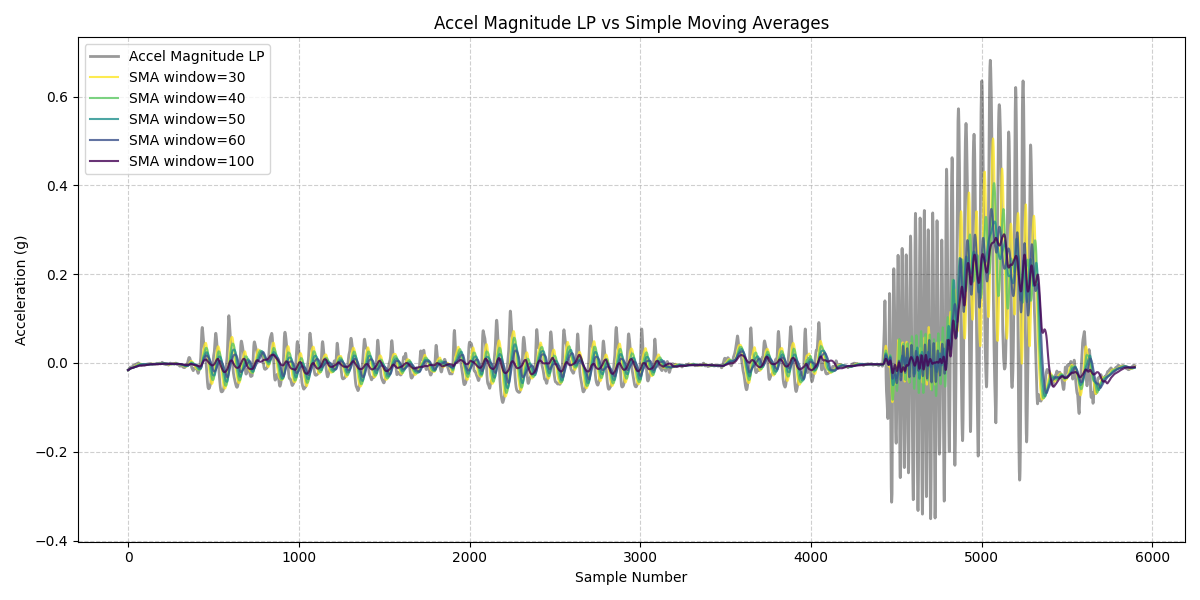

In [7]:
import matplotlib.pyplot as plt


def simple_moving_average(signal, window_size):
    """Calculates the Simple Moving Average of a signal."""
    filtered_signal = []
    for i in range(len(signal)):
        start_index = max(0, i - window_size + 1)
        window = signal[start_index : i + 1]
        window_average = sum(window) / len(window)
        filtered_signal.append(window_average)
    return filtered_signal

# Example window sizes for SMAs
window_sizes = [30, 40, 50, 60, 100]

# Calculate all SMAs of accel_magnitude_lp with different windows
sma_signals = [simple_moving_average(df['accel_magnitude_lp'], w) for w in window_sizes]

plt.figure(figsize=(12, 6))

# Plot the original low-pass filtered accel magnitude
plt.plot(df['accel_magnitude_lp'], label='Accel Magnitude LP', linewidth=2, color='black', alpha=0.4)

# Plot each SMA with different window sizes
colors = plt.cm.viridis_r(np.linspace(0, 1, len(window_sizes)))
for i, (sma, w) in enumerate(zip(sma_signals, window_sizes)):
    plt.plot(sma, label=f'SMA window={w}', alpha=0.8, color=colors[i])

plt.title('Accel Magnitude LP vs Simple Moving Averages')
plt.xlabel('Sample Number')
plt.ylabel('Acceleration (g)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


#### 30 parece ser a media de samples ideal

## peak detection

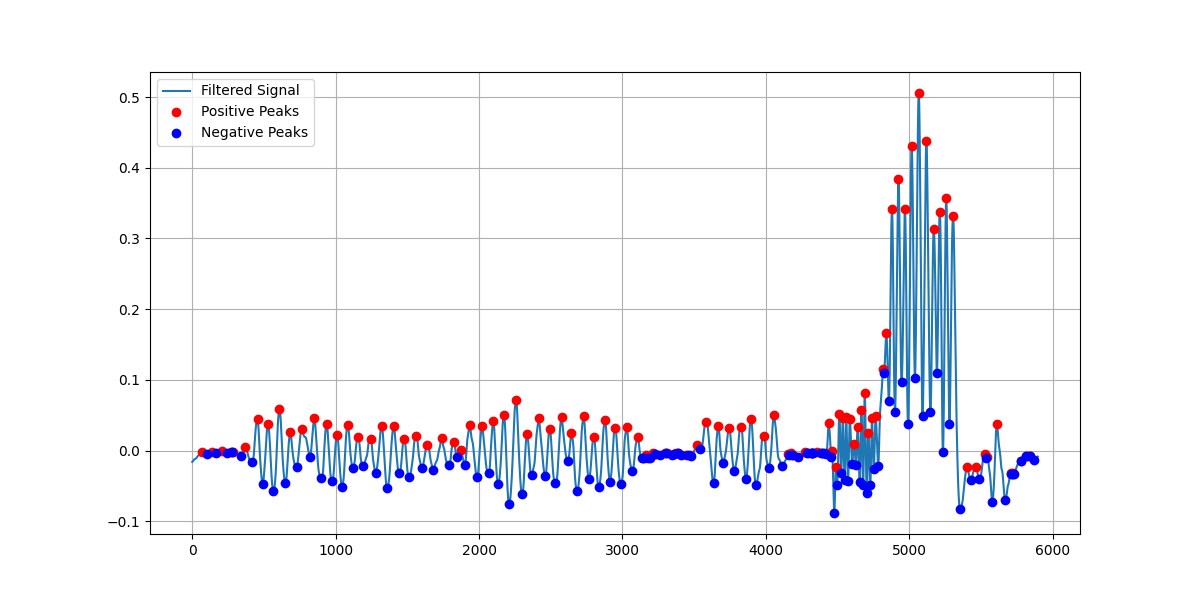

In [8]:
import numpy as np
import matplotlib.pyplot as plt

optimal_w = 30
signal = np.array(simple_moving_average(df['accel_magnitude_lp'], optimal_w))

peaks_pos = []
peaks_neg = []

# We'll keep track of the previous two points to check if the middle one is a peak
# Start iterating from index 2, so we have i-2, i-1, i points for checking peaks
for i in range(2, len(signal)):
    prev2 = signal[i-2]
    prev1 = signal[i-1]
    curr = signal[i]

    # Check if prev1 is a positive peak: goes up then down
    if prev1 > prev2 and prev1 > curr:
        peaks_pos.append(i-1)

    # Check if prev1 is a negative peak: goes down then up
    if prev1 < prev2 and prev1 < curr:
        peaks_neg.append(i-1)

plt.figure(figsize=(12, 6))
plt.plot(signal, label='Filtered Signal')
plt.plot(peaks_pos, signal[peaks_pos], 'ro', label='Positive Peaks')
plt.plot(peaks_neg, signal[peaks_neg], 'bo', label='Negative Peaks')
plt.legend()
plt.grid(True)
plt.show()


## step count

Step count: 22


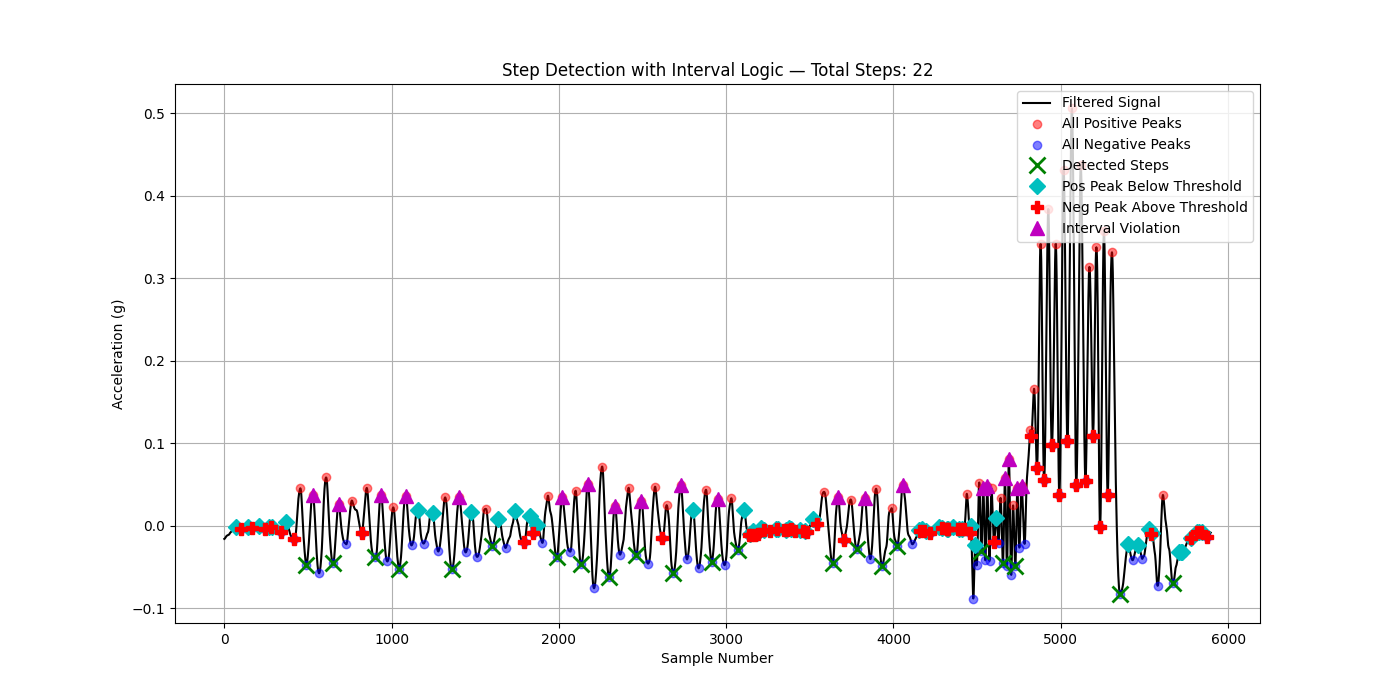

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Assume 'signal' is predefined. For a runnable example, uncomment below:
# x = np.linspace(0, 50, 800)
# s1 = np.sin(x/2)
# s2 = np.sin(x*5) * 0.1 # Add some noise/false peaks
# signal = s1 + s2

# --- Algorithm Parameters ---
pos_peak_thresh = 0.02
neg_peak_thresh = -0.02
min_peak_interval = 50  # <<< NEW: Minimum number of samples between steps

# --- Initialization ---
step_count = 0
steps_indices = []

# --- State Variables ---
found_valid_pos_peak = False
# Initialize to a value that allows the first step to be detected
last_step_index = -min_peak_interval 

# Store all peaks and violations for comprehensive plotting
all_pos_peaks = []
all_neg_peaks = []
violations = {
    "pos_peak_below_thresh": [],
    "neg_peak_above_thresh": [],
    "interval_violation": [],  # <<< NEW
}

# --- Iterative Peak Detection Loop ---
i = 1
while i < len(signal) - 1:
    # --- Detect Candidate Positive Peak (local max) ---
    if signal[i] > signal[i - 1] and signal[i] > signal[i + 1]:
        all_pos_peaks.append(i)
        
        # --- Run checks for the positive peak ---
        if signal[i] < pos_peak_thresh:
            # 1. Amplitude check failed
            violations["pos_peak_below_thresh"].append(i)
            found_valid_pos_peak = False
        elif (i - last_step_index) <= min_peak_interval:
            # 2. <<< NEW: Interval check failed
            violations["interval_violation"].append(i)
            found_valid_pos_peak = False
        else:
            # All checks passed, this is a valid candidate peak.
            found_valid_pos_peak = True

    # --- Detect Candidate Negative Peak (local min) ---
    if signal[i] < signal[i - 1] and signal[i] < signal[i + 1]:
        all_neg_peaks.append(i)
        
        # Check if the peak meets the amplitude threshold
        if signal[i] > neg_peak_thresh:
            violations["neg_peak_above_thresh"].append(i)
        elif found_valid_pos_peak:
            # SUCCESS: A valid positive peak was found, and now a valid negative peak.
            step_count += 1
            steps_indices.append(i) # Mark the step at the negative peak
            
            # --- Update state after successful step ---
            last_step_index = i # <<< NEW: Record the index of this step
            found_valid_pos_peak = False # Reset to look for the next positive peak

    i += 1

print(f"Step count: {step_count}")

# --- Plotting ---
plt.figure(figsize=(14, 7))
plt.plot(signal, label='Filtered Signal', linewidth=1.5, color='black')

# Plot all peaks
plt.plot(all_pos_peaks, signal[all_pos_peaks], 'ro', markersize=6, alpha=0.5, label='All Positive Peaks')
plt.plot(all_neg_peaks, signal[all_neg_peaks], 'bo', markersize=6, alpha=0.5, label='All Negative Peaks')

# Plot detected steps
plt.plot(steps_indices, signal[steps_indices], 'gx', markersize=12, mew=2, label='Detected Steps')

# Plot violations
if violations["pos_peak_below_thresh"]:
    plt.plot(violations["pos_peak_below_thresh"], signal[violations["pos_peak_below_thresh"]], 'cD', markersize=8, label='Pos Peak Below Threshold')
if violations["neg_peak_above_thresh"]:
    plt.plot(violations["neg_peak_above_thresh"], signal[violations["neg_peak_above_thresh"]], 'rP', markersize=8, label='Neg Peak Above Threshold')
if violations["interval_violation"]: # <<< NEW
    plt.plot(violations["interval_violation"], signal[violations["interval_violation"]], 'm^', markersize=10, label='Interval Violation')

plt.title(f'Step Detection with Interval Logic — Total Steps: {step_count}')
plt.xlabel('Sample Number')
plt.ylabel('Acceleration (g)')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

## conclusao retirada:
esta abordagem é boa no entanto so funciona bem para andar com cadencia constante
uma cadencia alternada em vez de tresholds considerar amplitude de diferenca entre um pico positivo e outro negativo consecutivo, se diferenca for > threshold_amplitude entao step é detetado

hm maybe usar big dataset onde training set sao os dados dos picos:
 diferenca de tempo entre ambos, posicoes relativas, threshold positivo e negativo, diferenca de amplitude entre picos
 fazer bruteforce para ver qual melhor combinacao de valores aceitaveis da mais accuracy OU
 fazer neural networks ou svm idk e ver quais é que tem a melhor performance para ver que valores optar? 